<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Reinforcement/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [6]:
import math
# we will try to find out with how low N we can find the same result as with N = 10000
N = 1000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if numbers_of_selections[i] > 0:
      average_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1)/numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  sums_of_rewards[ad] += dataset.values[n, ad]
  total_reward += dataset.values[n, ad]

## Visualising the results

Text(0, 0.5, 'Number of times ad was selected')

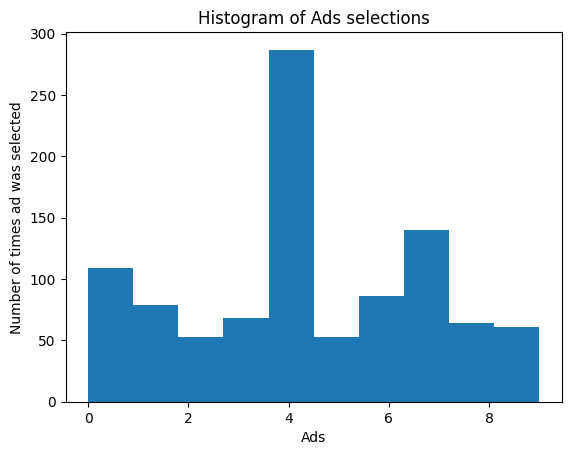

In [7]:
 plt.hist(ads_selected)
 plt.title('Histogram of Ads selections')
 plt.xlabel('Ads')
 plt.ylabel('Number of times ad was selected')